In [7]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd

# Loading / pyYin

First, we load in the audio and perform pyin for fundamental frequency tracking

In [8]:
y, sr = librosa.load("voice.wav")
ipd.Audio(y, rate=sr)

Text(0, 0.5, 'Frequency (hz)')

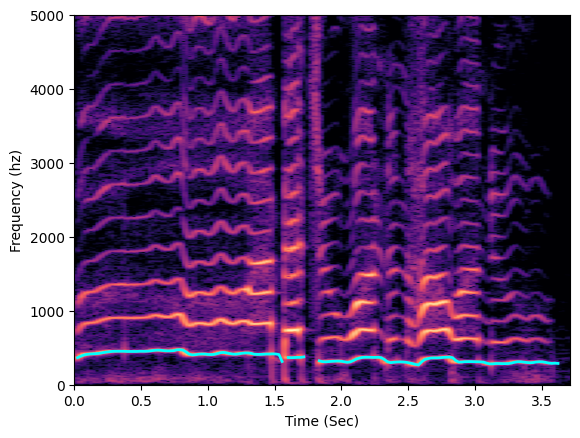

In [9]:
hop_length = 512
win_length = 2048
S = np.abs(librosa.stft(y, hop_length=hop_length, win_length=win_length))

maxfreqs, voiced_flag, voiced_probs = librosa.pyin(y, fmin=80, fmax=2000, sr=sr, hop_length=hop_length)
times = np.arange(len(maxfreqs))*hop_length/sr

plt.imshow(librosa.amplitude_to_db(S,ref=np.max), cmap='magma', extent=(times[0], times[-1], sr//2, 0), aspect='auto')
plt.ylim([0, 5000])
plt.plot(times, maxfreqs, linewidth=2, color='cyan')
plt.xlabel("Time (Sec)")
plt.ylabel("Frequency (hz)")


## Sonifying Instantaneous Frequency

In [14]:
def sonify_f0(maxfreqs, hop_length, sr):
    N = len(maxfreqs)
    df = np.zeros(N*hop_length) # Instantaneous frequency
    t = np.arange(hop_length)/sr

    ## TODO: Fill in df
    for i in range(len(maxfreqs)):
        if not np.isnan(maxfreqs[i]):
            df[i*hop_length:(i+1)*hop_length] = maxfreqs[i]

    # Integrate instantaneous frequency
    f = np.cumsum(df)/sr
    x = np.cos(2*np.pi*f)
    x = np.sign(x)*np.abs(x)**0.5
    return x

x = sonify_f0(maxfreqs, hop_length, sr)
ipd.Audio(x, rate=sr)

## Rounding Frequency To Nearest Note, Sonifying Again

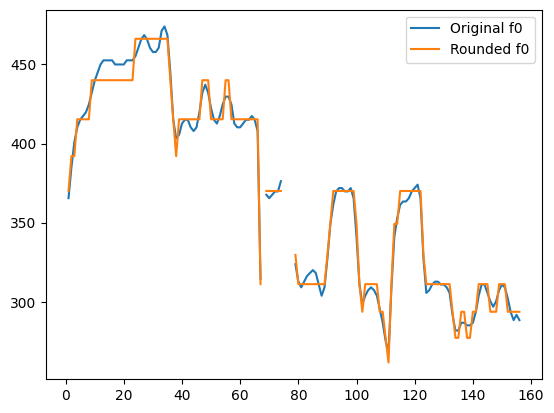

In [16]:
## TODO: Fill this in
maxfreqs_rounded = np.zeros_like(maxfreqs)

# f = 440*2^(P/12)

for i in range(len(maxfreqs)):
    f = maxfreqs[i]
    # P = 12*log2(f/440)/log2(2)
    p = np.log2(f/440)*12
    p = np.round(p)
    maxfreqs_rounded[i] = 440*2**(p/12)

    
plt.plot(maxfreqs)
plt.plot(maxfreqs_rounded)
plt.legend(["Original f0", "Rounded f0"])


x = sonify_f0(maxfreqs_rounded, hop_length, sr)
ipd.Audio(x, rate=sr)
    

## Autotuning

In [ ]:
%load_ext autoreload
%autoreload 2
from spectrogramtools import *

ratios = maxfreqs_round/maxfreqs
ratios[np.isnan(ratios)] = 1

S2 = np.zeros_like(S)
## TODO: Fill in S2 with warped frequencies in each column


yshift = griffinLimInverse(S2, win_length, hop_length)
ipd.Audio(yshift, rate=sr)